# Homework part I

The first problem set contains basic tasks in PyTorch.

__Note:__ Instead of doing this part of homework, you can prove your skills otherwise:
* A commit to PyTorch or PyTorch-based repos will do;
* Fully implemented seminar assignment in tensorflow or theano will do;
* Your own project in PyTorch that is developed to a state in which a normal human can understand and appreciate what it does.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch, torch.nn as nn
import torch.nn.functional as F
print(torch.__version__)

2.0.1+cu118


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

### Task I - tensormancy

![img](https://media.giphy.com/media/3o751UMCYtSrRAFRFC/giphy.gif)

When dealing with more complex stuff like neural network, it's best if you use tensors the way samurai uses his sword.


__1.1 The Cannabola__
[(_disclaimer_)](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (8 \cdot \theta) ) \cdot (1 + 0.1 \cdot cos(24 \cdot \theta)) \cdot (0.9 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (1 + sin(\theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

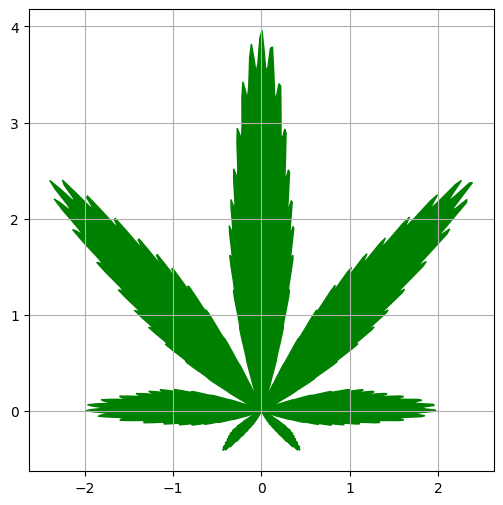

In [ ]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

rho = (1 + 0.9 * torch.cos(8 * theta)) * (1 + 0.1 * torch.cos(24 * theta)) * (0.9 + 0.05 * torch.cos(200 * theta)) * (1 + torch.sin(theta))

# Now convert polar (rho, theta) pairs into cartesian (x,y) to plot them.
x = rho * torch.cos(theta)
y = rho * torch.sin(theta)


plt.figure(figsize=[6, 6])
plt.fill(x.numpy(), y.numpy(), color='green')
plt.grid()

### Task II: The Game of Life

Now it's time for you to make something more challenging. We'll implement Conway's [Game of Life](http://web.stanford.edu/~cdebs/GameOfLife/) in _pure PyTorch_.

While this is still a toy task, implementing game of life this way has one cool benefit: __you'll be able to run it on GPU!__ Indeed, what could be a better use of your GPU than simulating Game of Life on 1M/1M grids?

![img](https://cdn.tutsplus.com/gamedev/authors/legacy/Stephane%20Beniak/2012/09/11/Preview_Image.png)
If you've skipped the URL above out of sloth, here's the Game of Life:
* You have a 2D grid of cells, where each cell is "alive"(1) or "dead"(0)
* Any living cell that has 2 or 3 neighbors survives, else it dies [0,1 or 4+ neighbors]
* Any cell with exactly 3 neighbors becomes alive (if it was dead)

For this task, you are given a reference NumPy implementation that you must convert to PyTorch.
_[NumPy code inspired by: https://github.com/rougier/numpy-100]_


__Note:__ You can find convolution in `torch.nn.functional.conv2d(Z,filters)`. Note that it has a different input format.

__Note 2:__ From the mathematical standpoint, PyTorch convolution is actually cross-correlation. Those two are very similar operations. More info: [video tutorial](https://www.youtube.com/watch?v=C3EEy8adxvc), [scipy functions review](http://programmerz.ru/questions/26903/2d-convolution-in-python-similar-to-matlabs-conv2-question), [stack overflow source](https://stackoverflow.com/questions/31139977/comparing-matlabs-conv2-with-scipys-convolve2d).

In [ ]:
from scipy.signal import correlate2d

def np_update(Z):
    # Count neighbours with convolution
    filters = np.array([[1, 1, 1],
                        [1, 0, 1],
                        [1, 1, 1]])

    N = correlate2d(Z, filters, mode='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z

In [ ]:
def torch_update(Z):
    """
    Implement an update function that does to Z exactly the same as np_update.
    :param Z: torch.FloatTensor of shape [height,width] containing 0s(dead) an 1s(alive)
    :returns: torch.FloatTensor Z after updates.

    You can opt to create new tensor or change Z inplace.
    """
    filters = torch.tensor([[1, 1, 1],
                            [1, 0, 1],
                            [1, 1, 1]])

    N = torch.nn.functional.conv2d(Z[None, None, :, :], filters[None, None, :, :].to(torch.float32), padding='same')

    # Apply rules
    birth = (N == 3) & (Z == 0)
    survive = ((N == 2) | (N == 3)) & (Z == 1)

    Z[:] = birth | survive
    return Z


In [ ]:
# initial frame
Z_numpy = np.random.choice([0, 1], p=(0.5, 0.5), size=(100, 100))
Z = torch.from_numpy(Z_numpy).type(torch.FloatTensor)

# your debug polygon :)
Z_new = torch_update(Z.clone())

# tests
Z_reference = np_update(Z_numpy.copy())
assert np.all(Z_new.numpy() == Z_reference), \
    "your PyTorch implementation doesn't match np_update. Look into Z and np_update(ZZ) to investigate."
print("Well done!")

Well done!


In [ ]:
%matplotlib notebook
plt.ion()

# initialize game field
Z = np.random.choice([0, 1], size=(100, 100))
Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # update
    Z = torch_update(Z)

    # re-draw image
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>

In [ ]:
# Some fun setups for your amusement

# parallel stripes
Z = np.arange(100) % 2 + np.zeros([100, 100])
# with a small imperfection
Z[48:52, 50] = 1

Z = torch.from_numpy(Z).type(torch.FloatTensor)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    Z = torch_update(Z)
    ax.clear()
    ax.imshow(Z.numpy(), cmap='gray')
    fig.canvas.draw()

<IPython.core.display.Javascript object>

More fun with Game of Life: [video](https://www.youtube.com/watch?v=C2vgICfQawE) and/or [Jupyter Notebook](https://nbviewer.jupyter.org/url/norvig.com/ipython/Life.ipynb)

### Task III: Going deeper
<img src="http://download.gamezone.com/uploads/image/data/1190338/article_post_width_a88.jpg" width=360>

Your third trial is to build your first neural network [almost] from scratch and pure PyTorch.

This time you will solve yet another digit recognition problem, but at a greater scale

* 10 different letters
* 20k samples

We want you to build a network that reaches at least 80% accuracy and has at least 2 linear layers in it. Naturally, it should be nonlinear to beat logistic regression.


With 10 classes you will need to use __Softmax__ at the top instead of sigmoid and train using __categorical crossentropy__ .  Write your own loss or use `torch.nn.functional.nll_loss`. Just make sure you understand what it accepts as input.

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) neural network should already give you an edge over logistic regression.


__[bonus kudos]__
If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! It should be possible to reach 90% without convnets.

__SPOILERS!__
At the end of the notebook you will find a few tips and frequent errors.
If you feel confident enough, just start coding right away and get there ~~if~~ once you need to untangle yourself.

In [ ]:
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall21/week02_autodiff/notmnist.py

Extracting ...
Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

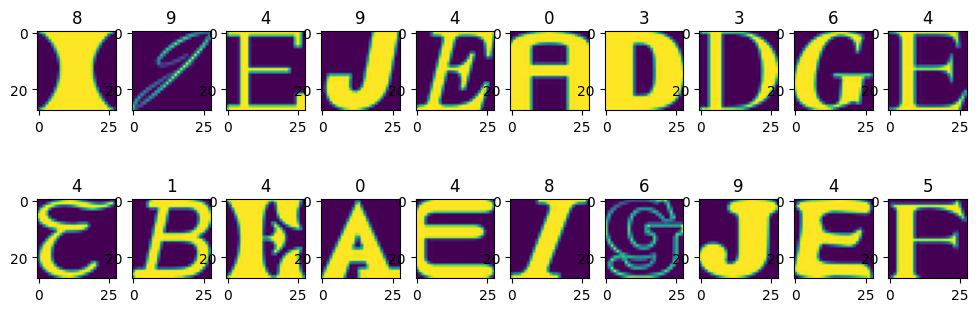

In [ ]:
from notmnist import load_notmnist

X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')

%matplotlib inline
plt.figure(figsize=[12, 4])
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, features: np.array, targets: np.array, transform: transforms.Compose):
        self.features = features
        self.targets = torch.tensor(targets)

        self.transform = transform

    def __getitem__(self, index):
        feature = self.transform(Image.fromarray(self.features[index, 0]))
        target = self.targets[index]
        return feature, target

    def __len__(self):
        return len(self.features)

transform = transforms.Compose([
    # transforms.RandomRotation(10),
    transforms.ToTensor()
])

train_data = CustomDataset(X_train, y_train, transform)
test_data = CustomDataset(X_test, y_test, transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

In [ ]:
def linear_layer(in_features, out_features):
    block = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=out_features),
        nn.BatchNorm1d(num_features=out_features),
        nn.Dropout1d(),
    )
    return block

class ImageClassifierNet(nn.Module):
    def __init__(self):
        super(self.__class__,self).__init__()

        self.flatten = nn.Flatten()

        self.fc1 = linear_layer(784, 400)
        self.fc2 = linear_layer(400,  10)


    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x

In [ ]:
def evaluate(model, loss_fn):
    model.eval()

    losses = []

    num_correct = 0
    num_elements = 0

    for X_batch, y_batch in test_loader:

        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        logits = model(X_batch)
        loss = loss_fn(logits, y_batch)

        y_pred = torch.argmax(logits, dim=1)

        num_correct += torch.sum(y_pred == y_batch).cpu()
        num_elements += len(y_batch)
        losses.append(loss.item())

    accuracy = num_correct / num_elements

    return accuracy.numpy(), np.mean(losses)

In [ ]:
def train(model, loss_fn, optimizer, n_epoch):
    model.train()
    for epoch in range(1, n_epoch + 1):

        for X_batch, y_batch in train_loader:

            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        val_accuracy, val_loss = evaluate(model, loss_fn=loss_fn)
        print("Эпоха {}/{}: val лосс: {:.4f}, accuracy: {:.4f}".format(
            epoch, n_epoch, val_loss, val_accuracy), end='\n')

    return model

In [ ]:
model = ImageClassifierNet().to(device)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
model = train(model, loss_fn, optimizer, n_epoch=9)

Эпоха 1/9: val лосс: 1.9824, accuracy: 0.8746
Эпоха 2/9: val лосс: 1.5685, accuracy: 0.9000
Эпоха 3/9: val лосс: 1.5642, accuracy: 0.9028
Эпоха 4/9: val лосс: 1.5578, accuracy: 0.9062
Эпоха 5/9: val лосс: 1.5540, accuracy: 0.9090
Эпоха 6/9: val лосс: 1.5541, accuracy: 0.9101
Эпоха 7/9: val лосс: 1.5509, accuracy: 0.9111
Эпоха 8/9: val лосс: 1.5488, accuracy: 0.9141
Эпоха 9/9: val лосс: 1.5524, accuracy: 0.9096


In [ ]:
image, label = train_data[0]


In [ ]:
logits = model(image.to(device))

In [ ]:
logits.argmax(), label


(tensor(8, device='cuda:0'), tensor(8))

In [ ]:
logits

tensor([[9.2798e-14, 8.4303e-16, 2.0375e-17, 6.9100e-19, 1.7720e-09, 2.8133e-19,
         1.9753e-14, 3.9461e-12, 1.0000e+00, 5.3783e-13]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)

In [ ]:
torch.nn.functional.softmax(logits, dim=1)

tensor([[0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320,
         0.0853]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
test_accuracy, _ = evaluate(model, loss_fn)
print('Accuracy на тесте {:.4f}'.format(test_accuracy))

Accuracy на тесте 0.9128


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000).fit(X_train.reshape(-1, 28 * 28), y_train)
lr_accuracy = lr.score(X_test.reshape(-1, 28 * 28), y_test)
print('Accuracy на тесте {:.4f}'.format(lr_accuracy))

assert test_accuracy > lr_accuracy, 'Logistic Regression is better then your Neural network. Try harder'

Accuracy на тесте 0.8573


```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

# SPOILERS!

Recommended pipeline:

* Adapt logistic regression from seminar assignment to classify one letter against others (e.g. A vs the rest)
* Generalize it to multiclass logistic regression.
  - Either try to remember lecture 0 or google it.
  - Instead of weight vector you'll have to use matrix (feature_id x class_id)
  - Softmax (exp over sum of exps) can be implemented manually or as `nn.Softmax` (layer) or `F.softmax` (function)
  - Probably better to use STOCHASTIC gradient descent (minibatch) for greater speed
    - You can also try momentum/rmsprop/adawhatever
    - in which case the dataset should probably be shuffled (or use random subsamples on each iteration)
* Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.
  - Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (e.g. sigmoid) instead of softmax
  - You need to train both layers, not just the output layer :)
  - 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve.
  - In ideal case this totals to 2 `torch.matmul`'s, 1 softmax and 1 ReLU/sigmoid
  - __Make sure this neural network works better than logistic regression!__

* Now's the time to try improving the network. Consider layers (size, neuron count), nonlinearities, optimization methods, initialization — whatever you want, but please avoid convolutions for now.

* If anything seems wrong, try going through one step of training and printing everything you compute.
* If you see NaNs midway through optimization, you can estimate $\log P(y \mid x)$ as `F.log_softmax(layer_before_softmax)`.